In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [45]:
binary_pitchers = pd.read_csv('data/model_data.csv')

In [46]:
binary_pitchers.columns

Index(['gameid', 'GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls',
       'strikes', 'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'hometeam_id', 'Home', 'awayteam_id', 'Visitor',
       'venue_id', 'venue_name', 'pitch_type', 'visscore', 'homscore',
       'on_first_base', 'r2bool', 'r3bool', 'last_pitch_na',
       'last_pitch_fastball', 'last_pitch_strike', 'score_diff',
       'in_scoring_position', 'inning_weight', 'base_factor', 'leverage',
       'platoon_l_l', 'platoon_r_r', 'platoon_l_r', 'balls_strikes',
       'Count_0_0', 'Count_0_1', 'Count_0_2', 'Count_1_0', 'Count_1_1',
       'Count_1_2', 'Count_2_0', 'Count_2_1', 'Count_2_2', 'Count_3_0',
       'Count_3_1', 'Count_3_2', 'batter_count', 'pitcher_count'],
      dtype='object')

### Fastball Rate by Batting Count and Heatmap

In [47]:
fastball_rate_count = binary_pitchers.groupby(['balls', 'strikes'])['pitch_type'].mean().reset_index().pivot(columns='strikes', index ='balls', values='pitch_type') 

In [48]:
fastball_rate_count

strikes,0,1,2
balls,,,
0,0.612120,0.554091,0.475698
1,0.652850,0.560284,0.485710
2,0.753401,0.638994,0.514671
3,0.948630,0.799707,0.610699


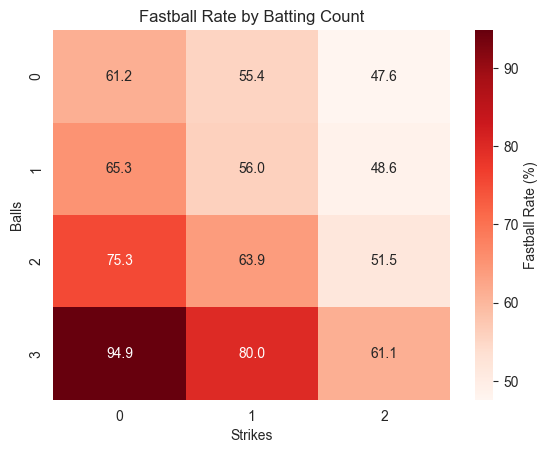

In [49]:
plt.title("Fastball Rate by Batting Count")
sns.heatmap(fastball_rate_count*100, annot=True, fmt='.1f', cmap = 'Reds', cbar_kws={'label': 'Fastball Rate (%)'})
plt.xlabel('Strikes')
plt.ylabel('Balls')
plt.show()

### Fastball Rate by # of Outs

In [50]:
fastball_outs = binary_pitchers.groupby('outs')['pitch_type'].agg(['mean', 'count']).reset_index() 

In [51]:
fastball_outs

,outs,mean,count
0,0,0.606901,48863
1,1,0.583138,49093
2,2,0.575100,50579


In [52]:
binary_pitchers['batting_order'] = binary_pitchers['ab'] % 9 + 1

In [53]:
binary_pitchers.groupby('batting_order')['pitch_type'].agg(['mean', 'count'])

,mean,count
batting_order,,
1,0.584284,16035
2,0.591809,16311
3,0.587264,16284
4,0.593011,16455
5,0.598602,16886
6,0.583922,16718
7,0.586207,16733
8,0.578916,16581
9,0.589765,16532


## Pitcher Characeristics

### When do our pitchers pitch?

In [54]:
innings_pitched = binary_pitchers.groupby('inning')['pitcher'].count().reset_index()

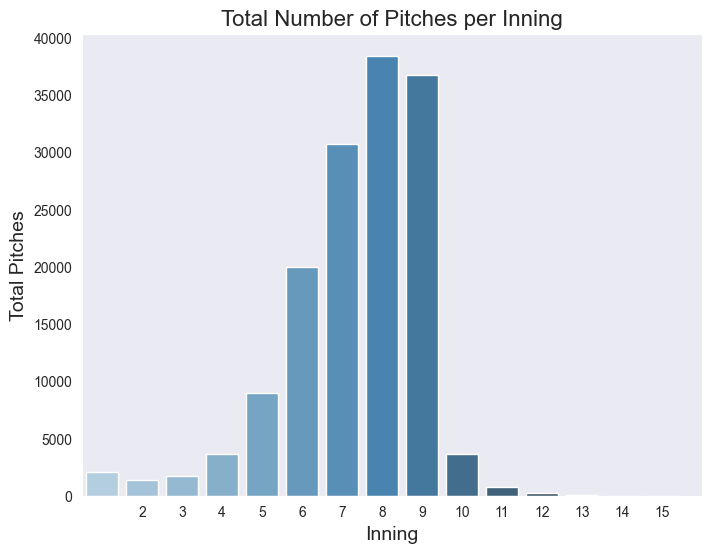

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x='inning', y='pitcher', data=innings_pitched, hue ='inning', palette="Blues_d", legend=False)

# Customize the plot
plt.title('Total Number of Pitches per Inning', fontsize=16)
plt.xlabel('Inning', fontsize=14)
plt.ylabel('Total Pitches', fontsize=14)
plt.xticks(range(1, int(innings_pitched['inning'].max()) + 1))  # Set x-ticks to display all innings

plt.show()

### Pitcher Throws vs Batter Side

In [56]:
binary_pitchers.columns

Index(['gameid', 'GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls',
       'strikes', 'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'hometeam_id', 'Home', 'awayteam_id', 'Visitor',
       'venue_id', 'venue_name', 'pitch_type', 'visscore', 'homscore',
       'on_first_base', 'r2bool', 'r3bool', 'last_pitch_na',
       'last_pitch_fastball', 'last_pitch_strike', 'score_diff',
       'in_scoring_position', 'inning_weight', 'base_factor', 'leverage',
       'platoon_l_l', 'platoon_r_r', 'platoon_l_r', 'balls_strikes',
       'Count_0_0', 'Count_0_1', 'Count_0_2', 'Count_1_0', 'Count_1_1',
       'Count_1_2', 'Count_2_0', 'Count_2_1', 'Count_2_2', 'Count_3_0',
       'Count_3_1', 'Count_3_2', 'batter_count', 'pitcher_count',
       'batting_order'],
      dtype='object')

In [57]:
pd.crosstab(binary_pitchers['pitcherthrows'], binary_pitchers['batterside'], margins=True)

batterside,L,R,All
pitcherthrows,,,
L,14985,25046,40031
R,46783,61721,108504
All,61768,86767,148535


In [58]:
binary_pitchers.groupby(['pitcherthrows', 'batterside'])['pitch_type'].mean().reset_index()

,pitcherthrows,batterside,pitch_type
0,L,L,0.593260
1,L,R,0.652998
2,R,L,0.596969
3,R,R,0.554074


### Most prominent pitchers in Dataset

In [59]:
name_counts = binary_pitchers.groupby('pitcher')['pitchnum'].count()

In [60]:
name_counts.sort_values(ascending=False)

pitcher
Clase, Emmanuel     3083
Holmes, Clay        3070
Romano, Jordan      2930
Abreu, Bryan        2917
Pallante, Andre     2892
                    ... 
Gonzalez, Marwin      14
Ramirez, Roel         14
Ryan, Ryder           13
Calvo, Blair          11
Danner, Hagen          7
Name: pitchnum, Length: 198, dtype: int64

In [61]:
frequent_pitchers = name_counts[name_counts > 100].index

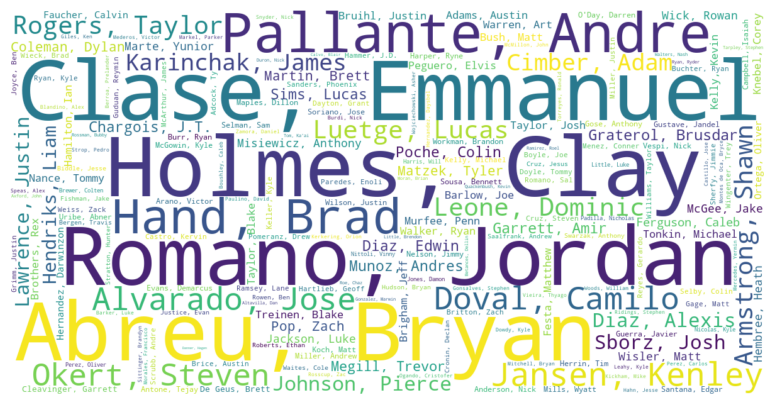

In [62]:
wordcloud = WordCloud(width=1200, height=612, background_color='white',  contour_width = 2,
     contour_color = 'black').generate_from_frequencies(name_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis lines
plt.show()


In [63]:
big_sample_pitchers = binary_pitchers.loc[binary_pitchers['pitcher'].isin(frequent_pitchers)]

In [64]:
plot_df = big_sample_pitchers.groupby('pitcher')['pitch_type'].mean().sort_values()

In [65]:
plot_df

pitcher
Wisler, Matt        0.088542
Adams, Austin       0.125367
Harper, Ryne        0.219081
Sanders, Phoenix    0.255814
McGowin, Kyle       0.313346
                      ...   
Burr, Ryan          0.910811
Wilson, Justin      0.927052
Armstrong, Shawn    0.927244
Hudson, Bryan       0.963415
Alvarado, Jose      0.980510
Name: pitch_type, Length: 146, dtype: float64

(0.0, 1.0)

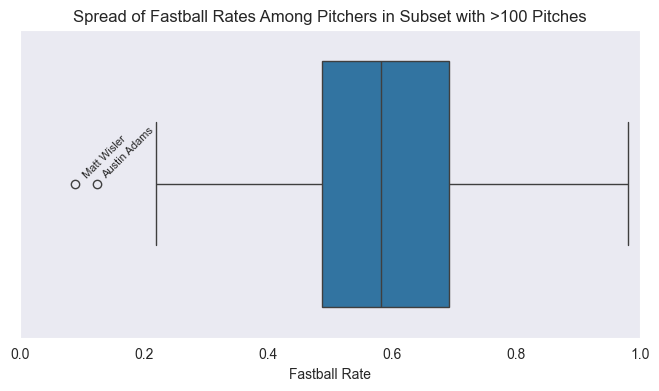

In [66]:
sns.set_style('dark')

plt.figure(figsize=(8, 4))
sns.boxplot(data=plot_df.values, orient = 'h')
plt.xlabel('Fastball Rate')
plt.title('Spread of Fastball Rates Among Pitchers in Subset with >100 Pitches')
plt.text(0.13, -0.02, "Austin Adams", size = 8, rotation=45)
plt.text(0.1, -0.02, "Matt Wisler", size = 8, rotation=45)
plt.xlim(0, 1)

(array([ 2.,  0.,  1.,  1.,  0.,  8.,  5.,  7., 15., 20., 13., 12., 16.,
        16.,  8.,  3.,  4.,  8.,  5.,  2.]),
 array([0.08854167, 0.13314007, 0.17773847, 0.22233688, 0.26693528,
        0.31153369, 0.35613209, 0.40073049, 0.4453289 , 0.4899273 ,
        0.53452571, 0.57912411, 0.62372251, 0.66832092, 0.71291932,
        0.75751773, 0.80211613, 0.84671453, 0.89131294, 0.93591134,
        0.98050975]),
 <BarContainer object of 20 artists>)

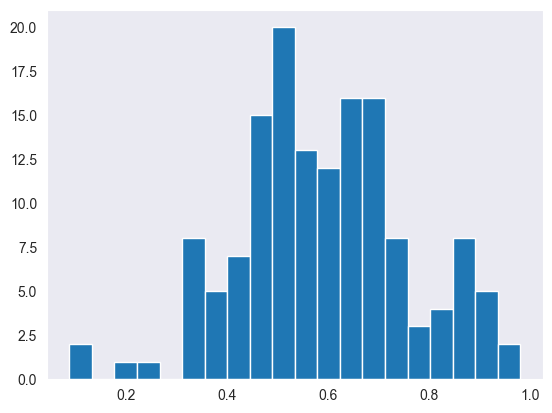

In [67]:
plt.hist(plot_df.values, bins=20)

In [68]:
binary_pitchers.groupby('pitch_type')['pitchname_desc'].value_counts(normalize=True)

pitch_type  pitchname_desc
0           Slider            0.743771
            Curveball         0.177801
            Sweeper           0.044650
            Knuckle Curve     0.033059
            Slow Curve        0.000719
1           Four-seam FB      0.562921
            Sinker            0.277426
            Cutter            0.157878
            Fastball          0.001282
            Two-seam FB       0.000492
Name: proportion, dtype: float64

In [69]:
fastball_by_score = binary_pitchers.groupby('score_diff')['pitch_type'].mean().reset_index()
mean_fastballs = binary_pitchers['pitch_type'].mean()

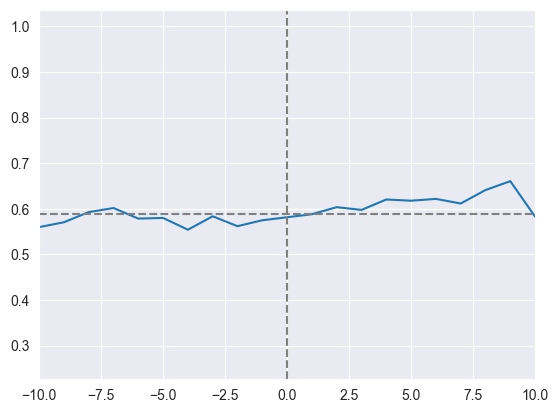

In [70]:
plt.plot(fastball_by_score['score_diff'], fastball_by_score['pitch_type'])
plt.xlim(-10, 10)
plt.axhline(y=mean_fastballs, color='gray', linestyle = '--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid()

In [71]:
binary_pitchers.groupby(['on_first_base', 'r2bool', 'r3bool'])['pitch_type'].mean()

on_first_base  r2bool  r3bool
False          False   False     0.590568
                       True      0.566691
               True    False     0.562934
                       True      0.570503
True           False   False     0.608189
                       True      0.556860
               True    False     0.575976
                       True      0.597587
Name: pitch_type, dtype: float64

In [72]:
binary_pitchers = binary_pitchers.sort_values(by=['gameid', 'ab', 'pitchnum'])
binary_pitchers['pitch_of_game'] = binary_pitchers.groupby('gameid').cumcount() + 1

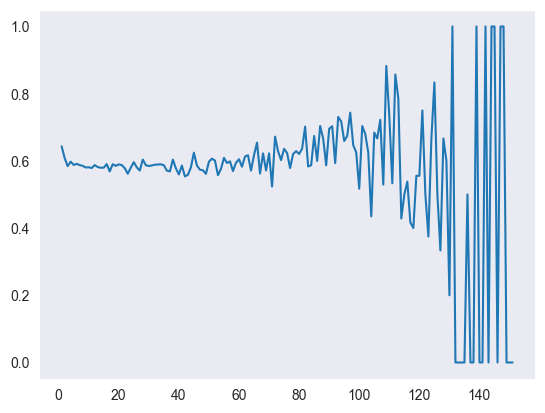

In [73]:
plt.plot(binary_pitchers.groupby('pitch_of_game')['pitch_type'].mean())

In [74]:
fastballs_by_field = binary_pitchers.groupby('venue_name')['pitch_type'].mean().reset_index()

C:\Users\johng\AppData\Local\Temp\ipykernel_25016\3098717068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fastballs_by_field.sort_values('pitch_type'), x='venue_name', y='pitch_type', palette='Set2')


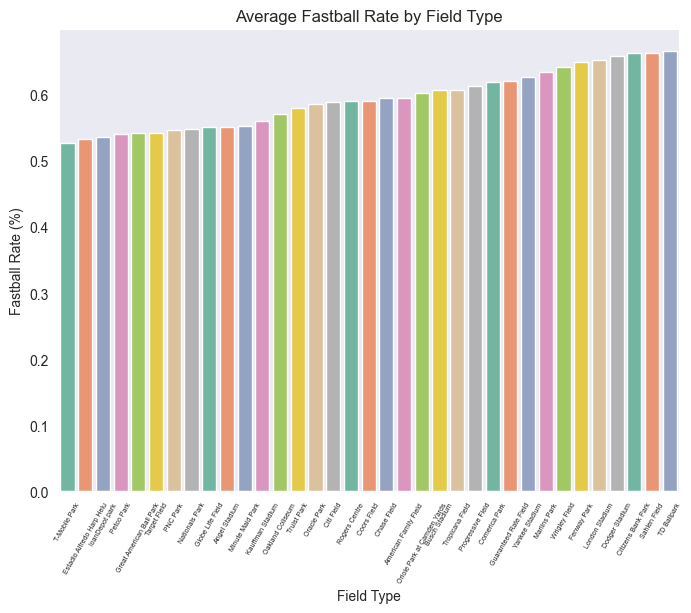

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(data=fastballs_by_field.sort_values('pitch_type'), x='venue_name', y='pitch_type', palette='Set2')
plt.title('Average Fastball Rate by Field Type')
plt.xlabel('Field Type')
plt.ylabel('Fastball Rate (%)')
plt.xticks(fontsize=5, rotation=60)
plt.show()